# Mass Account Summary Extraction
At the Financial Training Centre (FTC) of the School of Business Management in NYP, we conduct trading simulation using Interactive Brokers (IB) TWS. To encourage healthy competition, we extract their NLV from IB and rank them according to their profit and loss (PnL).

**import necessary libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

**import IbPy library**

In [2]:
import time
from datetime import datetime
from IBWrapper import IBWrapper, contract
from ib.ext.EClientSocket import EClientSocket
from ib.ext.ScannerSubscription import ScannerSubscription

**Extract current batch of students' IB account number**

In [3]:
def obtain_ib_acct():
    return pd.read_excel("G:/live/CURRENT_BATCH_IB.xlsx", sheetname="2016S1R2")[['ADM_NO','NAME','IB ACCT']]

In [4]:
df = obtain_ib_acct()         # Obtain current batch IB account number        

In [5]:
callback = IBWrapper()        # Instantiate IBWrapper. callback 
tws = EClientSocket(callback) # Instantiate EClientSocket and return data to callback

In [6]:
host = ""
port = 4001
clientId = 202

**Connect to TWS**

In [7]:
tws.eConnect(host, port, clientId) # Connect to TWS

Server Version: 76
TWS Time at connection:20160513 11:43:38 SGT


In [8]:
tws.setServerLogLevel(5)           # Set error output to verbose

In [9]:
create = contract()                # Instantiate contract class
callback.initiate_variables()

**Submit request for Account Summary. Asking for NLV for "All" accounts**

In [10]:
reqID = 1001
tws.reqAccountSummary(reqID,"All","NetLiquidation")

**TWS often send back duplicate data. We drop the duplicates and keep the last figure**

In [11]:
res = pd.DataFrame(callback.account_Summary,
                  columns = ["reqID", "IB ACCT", "Key", 
                             "NLV", "Currency"])[["IB ACCT", "NLV"]]
res["IB ACCT"].drop_duplicates(keep = "last", inplace=True)

In [12]:
current_batch_nlv = pd.merge(df, res, on="IB ACCT")

In [13]:
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")

**Calculate each student's PnL and visualise the data**

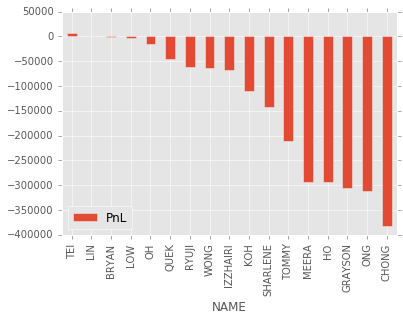

In [14]:
Init_bal = 1000000
current_batch_nlv["PnL"] = current_batch_nlv["NLV"].astype(float) - Init_bal
current_batch_nlv.sort_values(by = "PnL", ascending=False, inplace=True)
current_batch_nlv.plot(kind="bar", x=current_batch_nlv["NAME"].str.split(" ").str.get(0))

**Not a good trading period. Obviously**

In [15]:
tws.eDisconnect()